In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [4]:
train = pd.read_csv('../数据集/维基百科词条EDA/train_1.csv').fillna(0)
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col],downcast='integer')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [8]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group()[0:2]
    return 'na'

train['lang'] = train.Page.map(get_language)
from collections import Counter
print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [9]:
lang_sets={}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0)/ lang_sets[key].shape[0]

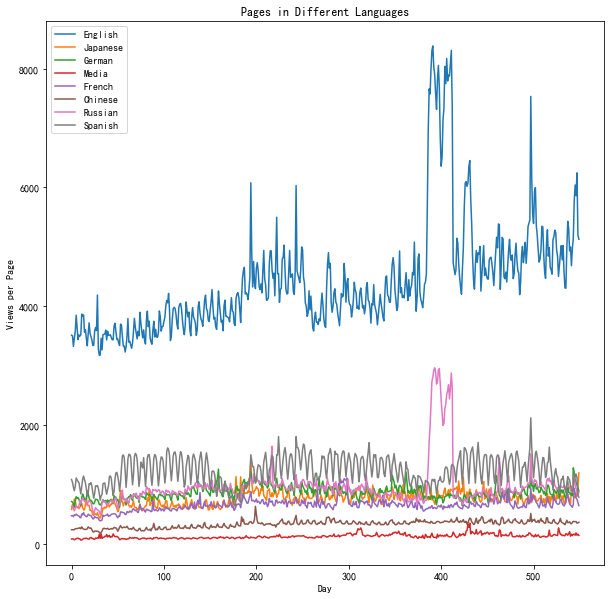

In [11]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels ={'en':'English','ja':'Japanese','de':'German','na':'Media',
        'fr':'French','zh':'Chinese','ru':'Russian','es':'Spanish'}
for key in sums:
    plt.plot(days,sums[key],label=labels[key])
    
plt.legend()
plt.show()

In [14]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    plt.show()

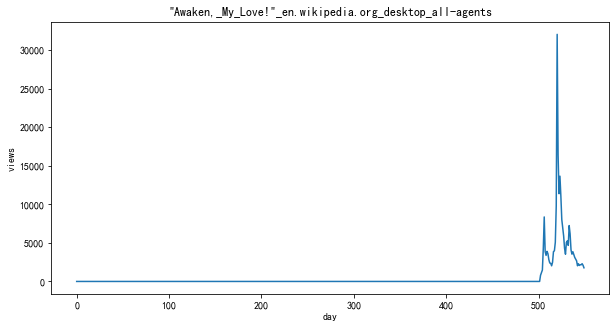

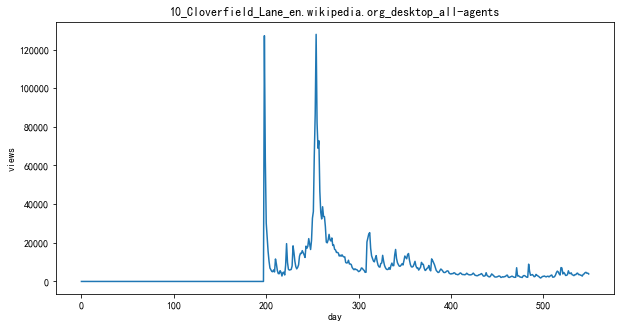

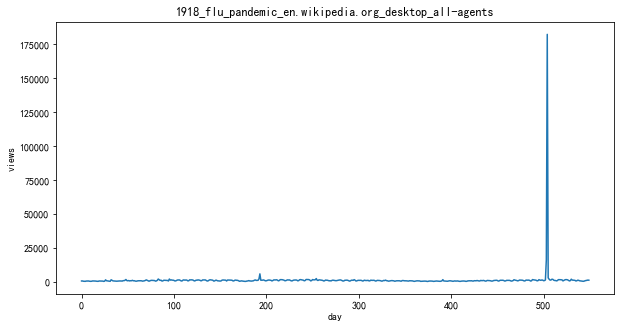

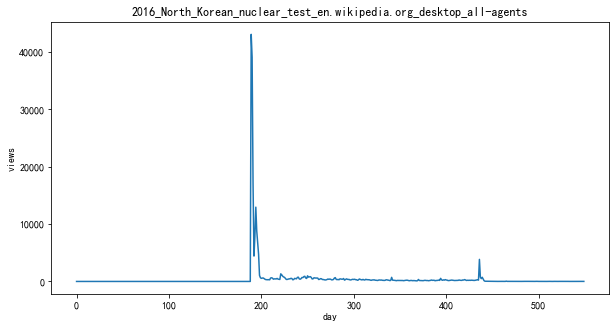

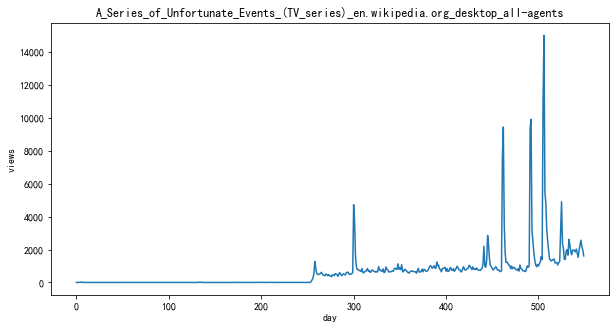

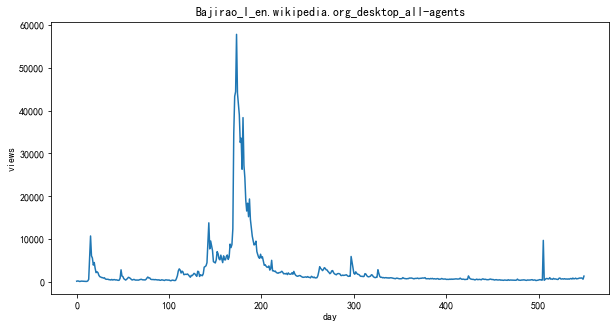

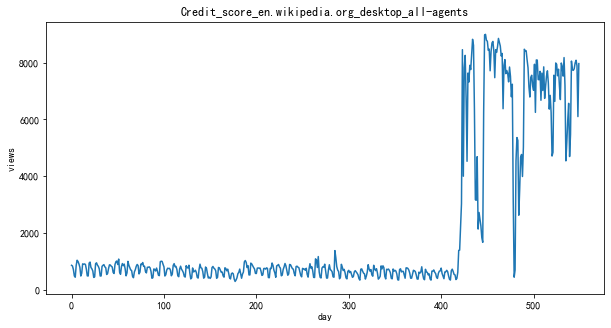

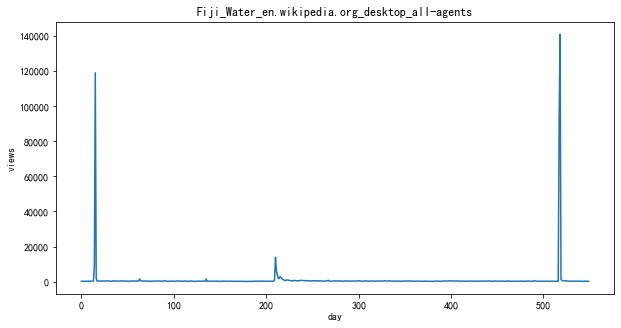

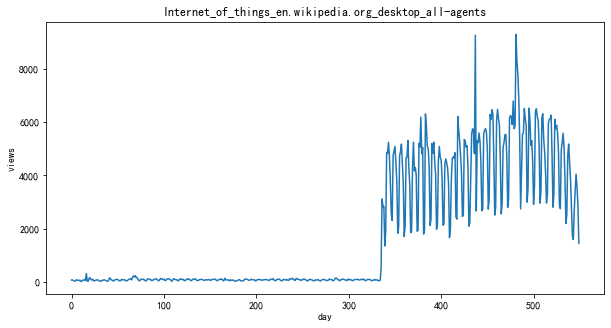

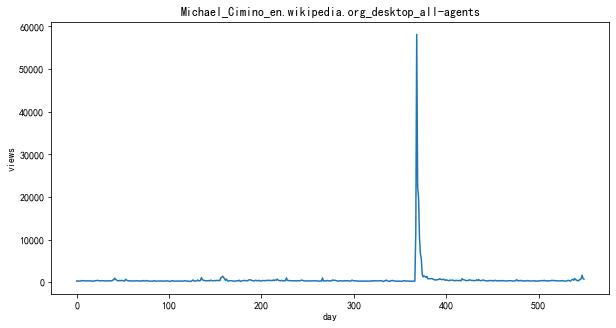

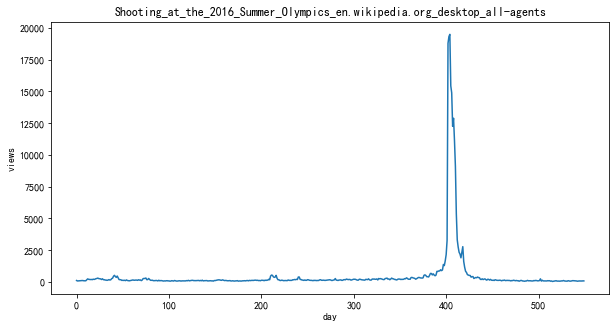

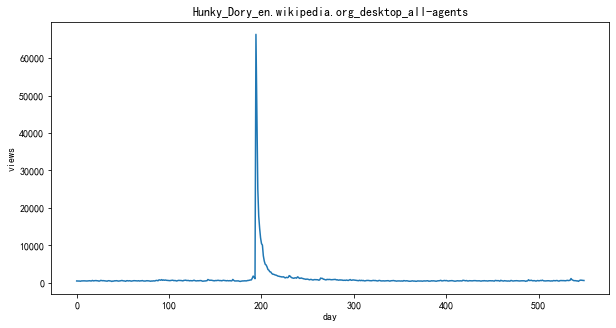

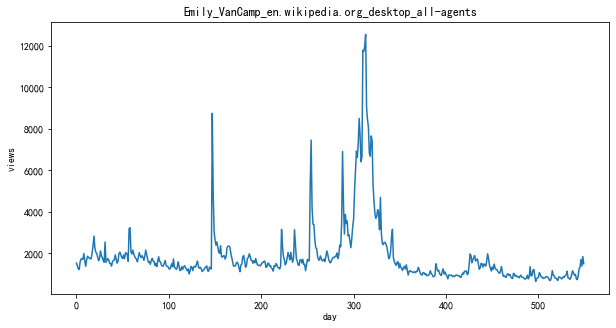

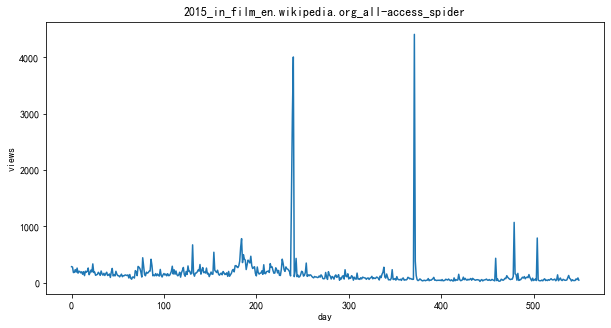

In [15]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

In [16]:
npages = 5
top_pages={}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set=sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key]=sum_set.index[0]
    print('\n\n')

en
                                                    Page        total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  12066181102
9774       Main_Page_en.wikipedia.org_desktop_all-agents   8774497458
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents   3153984882
39180  Special:Search_en.wikipedia.org_all-access_all...   1304079353
10403  Special:Search_en.wikipedia.org_desktop_all-ag...   1011847748
74690  Special:Search_en.wikipedia.org_mobile-web_all...    292162839
39172  Special:Book_en.wikipedia.org_all-access_all-a...    133993144
10399   Special:Book_en.wikipedia.org_desktop_all-agents    133285908
33644       Main_Page_en.wikipedia.org_all-access_spider    129020407
34257  Special:Search_en.wikipedia.org_all-access_spider    124310206



ja
                                                     Page      total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415
123025       特

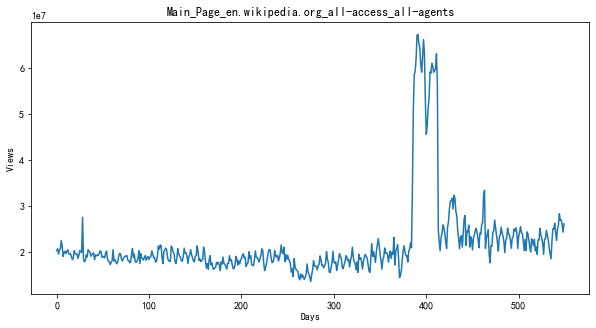

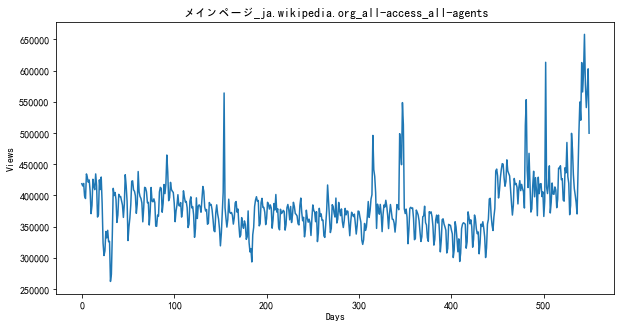

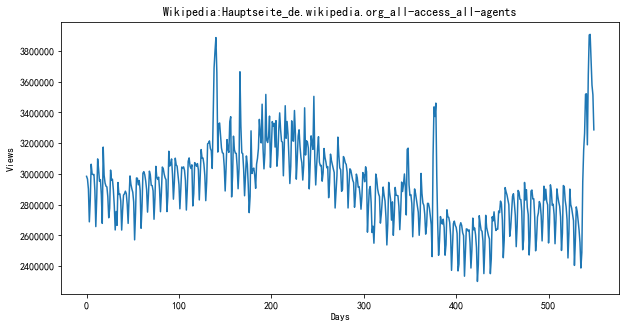

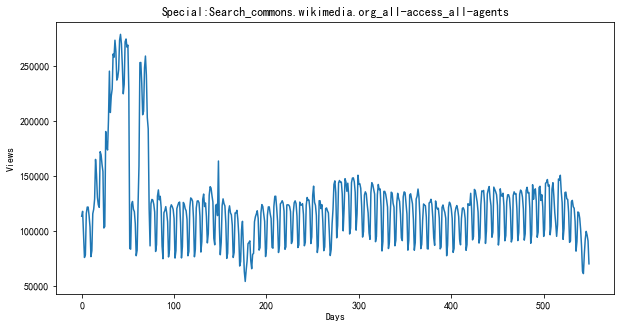

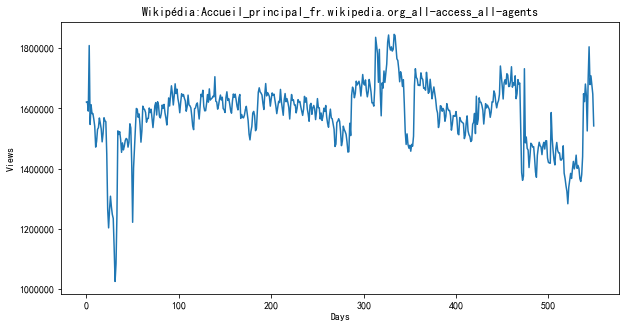

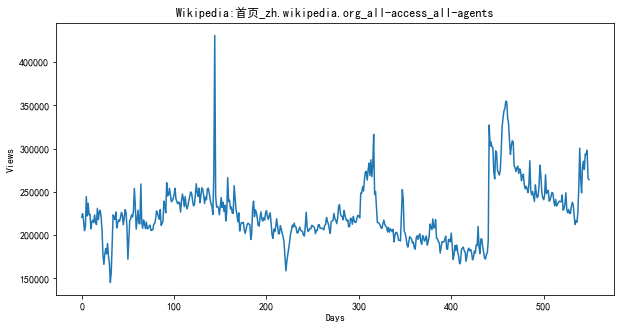

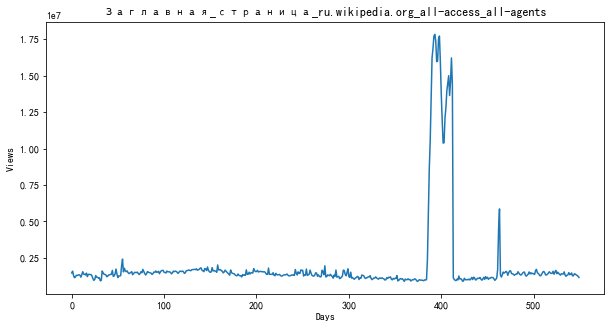

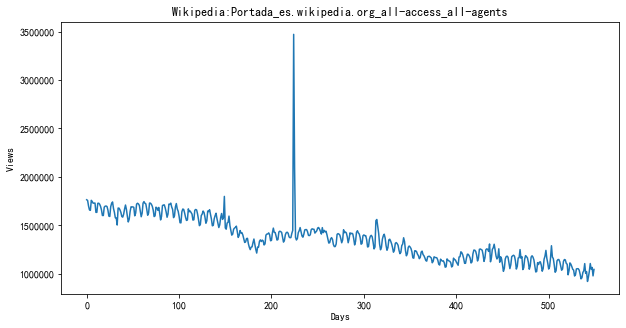

In [17]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols =train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()

In [18]:
lang_sets['zh']

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109445,三生三世十里桃花_(電影)_zh.wikipedia.org_mobile-web_all-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109446,只為你停留_zh.wikipedia.org_mobile-web_all-agents,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109447,萧建华_zh.wikipedia.org_mobile-web_all-agents,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109448,2017年港鐵縱火案_zh.wikipedia.org_mobile-web_all-agents,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
data=lang_sets['zh'].loc[0,:]

In [96]:
# plt.plot(data['Page'],data['2NE1_zh.wikipedia.org_all-access_spider'])
data

Page          2NE1_zh.wikipedia.org_all-access_spider
2015-07-01                                         18
2015-07-02                                         11
2015-07-03                                          5
2015-07-04                                         13
                               ...                   
2016-12-27                                         20
2016-12-28                                         22
2016-12-29                                         19
2016-12-30                                         18
2016-12-31                                         20
Name: 0, Length: 551, dtype: object

In [97]:
from pandas import DataFrame
data = DataFrame(data)

In [98]:
data

,0
Page,2NE1_zh.wikipedia.org_all-access_spider
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
...,...
2016-12-27,20
2016-12-28,22
2016-12-29,19
2016-12-30,18


In [99]:
data = data.drop('Page',axis=0)

In [100]:
data

,0
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
2015-07-05,14
...,...
2016-12-27,20
2016-12-28,22
2016-12-29,19
2016-12-30,18


In [76]:
data.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [113]:
data.values

array([[18],
       [11],
       [5],
       [13],
       [14],
       [9],
       [9],
       [22],
       [26],
       [24],
       [19],
       [10],
       [14],
       [15],
       [8],
       [16],
       [8],
       [8],
       [16],
       [7],
       [11],
       [10],
       [20],
       [18],
       [15],
       [14],
       [49],
       [10],
       [16],
       [18],
       [8],
       [5],
       [9],
       [7],
       [13],
       [9],
       [7],
       [4],
       [11],
       [10],
       [5],
       [9],
       [9],
       [9],
       [9],
       [13],
       [4],
       [15],
       [25],
       [9],
       [5],
       [6],
       [20],
       [3],
       [14],
       [46],
       [5],
       [5],
       [13],
       [4],
       [9],
       [10],
       [9],
       [11],
       [11],
       [11],
       [9],
       [15],
       [5],
       [10],
       [7],
       [4],
       [8],
       [9],
       [10],
       [6],
       [13],
       [16],
       [6],
       [24

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

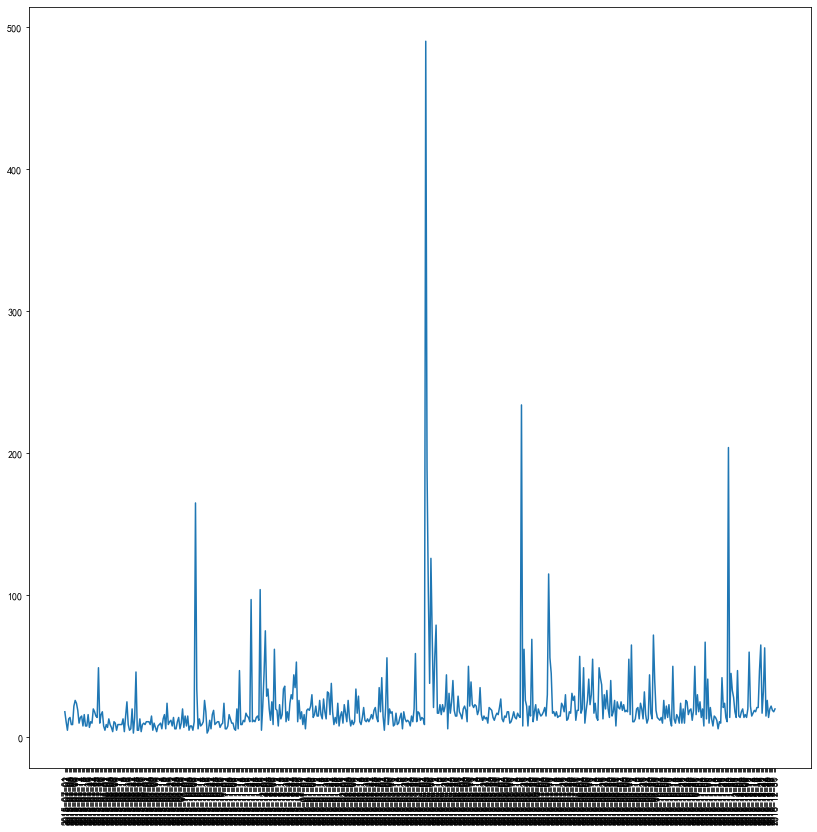

In [110]:
plt.figure(1,figsize=(14,14))
plt.plot(data.index,data.values)
plt.xticks(rotation=90)#横坐标变换45度

In [118]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [119]:
data.shape

(550, 1)

In [120]:
data.head()

,0
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
2015-07-05,14


In [121]:
data.iloc[:,0]

2015-07-01    18
2015-07-02    11
2015-07-03     5
2015-07-04    13
2015-07-05    14
              ..
2016-12-27    20
2016-12-28    22
2016-12-29    19
2016-12-30    18
2016-12-31    20
Name: 0, Length: 550, dtype: object

In [122]:
n_sample = data.shape[0]

In [123]:
n_train = int(0.95*n_sample)+1
n_forecast=n_sample-n_train
data_train=data.iloc[:n_train][0]
data_test = data.iloc[n_train:][0]


TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

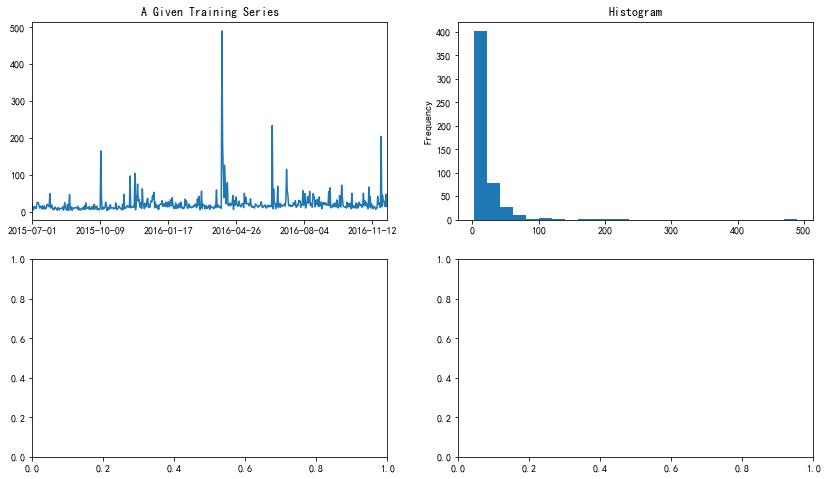

In [124]:
tsplot(data_train, title='A Given Training Series', lags=20)

In [117]:
data_train

2015-07-01    18
2015-07-02    11
2015-07-03     5
2015-07-04    13
2015-07-05    14
              ..
2016-11-30    18
2016-12-01    14
2016-12-02    47
2016-12-03    15
2016-12-04    14
Name: 0, Length: 523, dtype: object